In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [38]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
novaMatrícula

,Código Candidato,Data de nascimento,Série,Unidade,Data de Inscrição,Data da matrícula,Tipo,Bolsa (%),Real Anuidade,Diferença,Bolsa
0,CL0002,21/1/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
1,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
2,CL0047,19/04/2015,5º ano,Conceição do Mato Dentro,2024-12-02,2024-12-02,Matrícula nova,"100,00%",11.471,0,100.0
3,CL0072,07/09/2022,Infantil 2,Castelo,2024-08-17,2024-12-09,Matrícula nova,"65,00%",8.515,114,65.0
4,CL0102,12/08/2022,Infantil 2,Castelo Manacás,2024-10-31,2025-01-21,Matrícula nova,"63,00%",7.453,82,63.0
...,...,...,...,...,...,...,...,...,...,...,...
1728,CL9940,08/02/2018,2º ano,Lagoa Santa,2025-01-15,2025-01-15,Matrícula nova,"55,00%",11.038,0,55.0
1729,CL9966,29/6/2015,4º ano,Alípio de Melo,2024-10-10,2024-11-19,Matrícula nova,"56,00%",11.106,40,56.0
1730,CL9979,9/7/2014,5º ano bilíngue,Lagoa Santa,2024-08-16,2024-12-20,Matrícula nova,"43,00%",14.421,126,43.0
1731,CL9987,11/04/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0


In [39]:
nM = novaMatrícula[['Data da matrícula', 'Bolsa']] 
rM = rematrícula[['Data da matrícula', 'Bolsa']] 

In [40]:
nM = nM.sort_values(by = ['Data da matrícula'])
rM = rM.sort_values(by = ['Data da matrícula'])

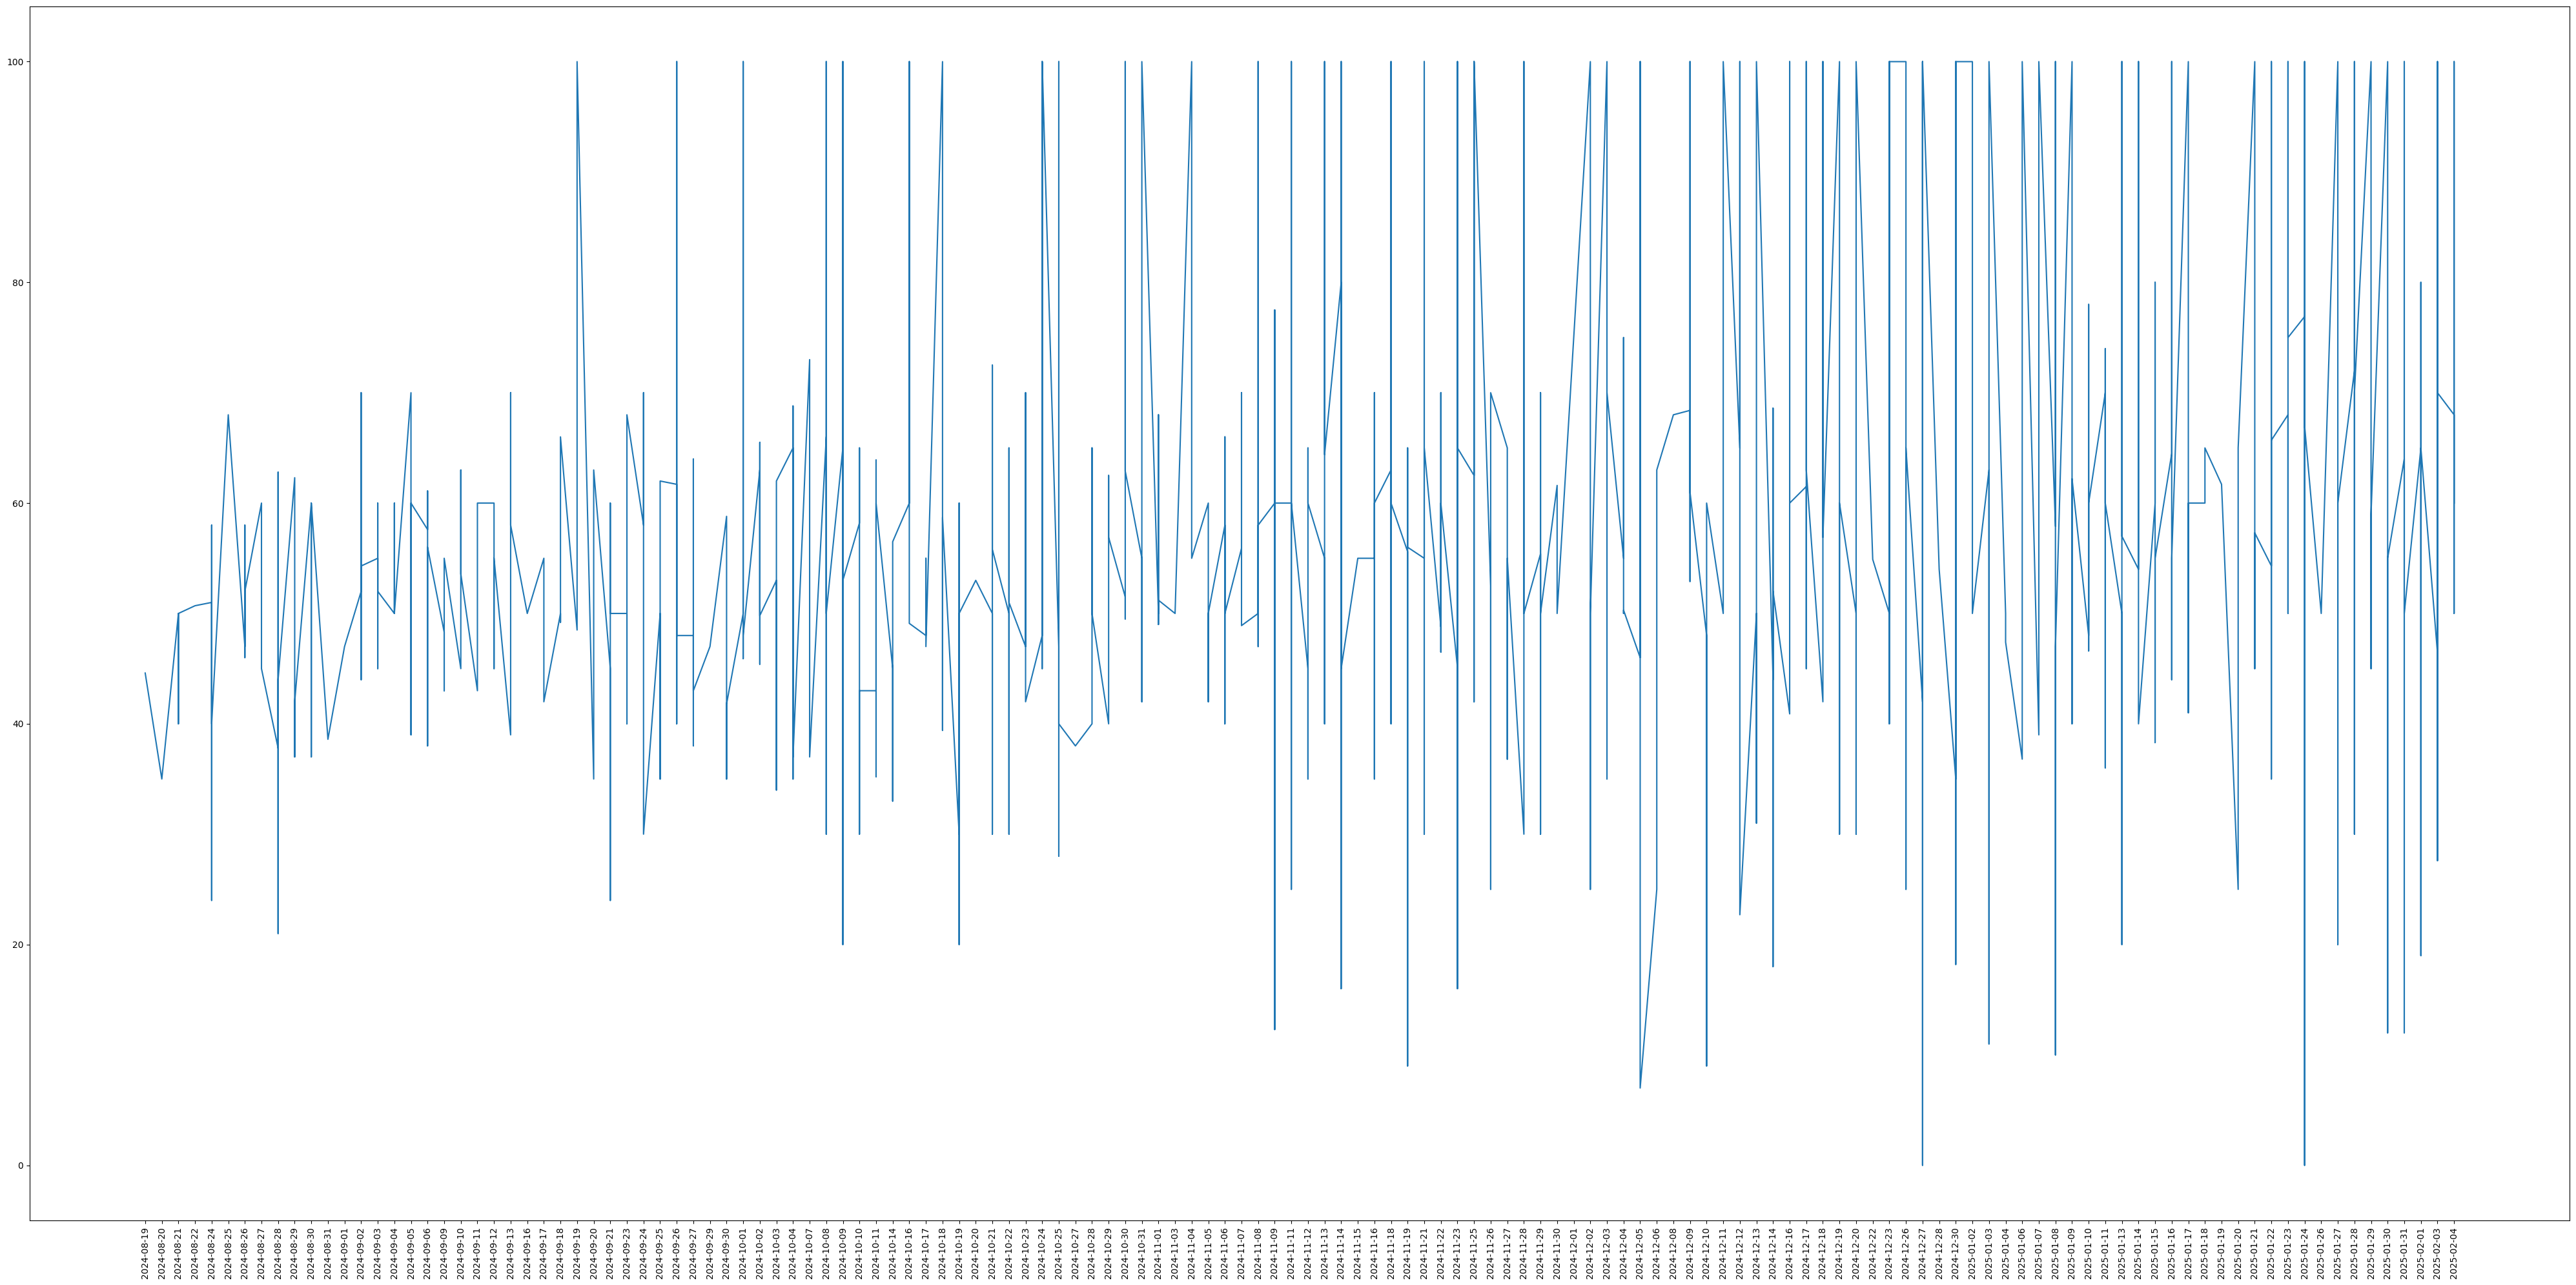

In [41]:
fig = plt.subplots(figsize = (40, 20) )

plt.plot(nM['Data da matrícula'], nM['Bolsa'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0)
plt.tight_layout()


